### Import libraries

In [1]:
from os import getcwd
from os.path import join, abspath, pardir, relpath, exists

import pandas as pd
import numpy as np
from numpy import matrixlib as npmat
import networkx as nx
from typing import Union

from IPython.display import IFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Helper methods

In [2]:
# ------------------------ #
# Helper logging functions
# ------------------------ #
def print_log(text: str) -> None:
    """ Prints the log """
    print(f"[ log ]: {text}")

def print_error(text: str) -> None:
    """ Prints the error """
    print(f"[ error ]: {text}")
# -------------------------------------------------- #
# Helper functions for matrix related operations
# -------------------------------------------------- #
def graph_to_matrix(G: Union[nx.Graph, npmat.matrix]) -> npmat.matrix:
    """
    Converts a graph to a matrix
    """
    return nx.to_numpy_matrix(G) if isinstance(G, nx.Graph) else G

def matrix_to_graph(matrix: Union[nx.Graph, npmat.matrix]) -> nx.Graph:
    """
    Convert from a numpy matrix to a network graph
    """
    return nx.from_numpy_matrix(matrix) if isinstance(matrix, npmat.matrix) else matrix

def undirected_to_directed(graph: nx.Graph) -> nx.DiGraph:
    """
    Converts an undirected graph to a directed graph
    """
    di_graph = nx.DiGraph()
    di_graph.add_edges_from(graph.edges())
    return di_graph

def csv_to_matrix(csv_file: str) -> npmat.matrix:
    """
    Returns a matrix from a csv file
    """
    return npmat.asmatrix(pd.read_csv(csv_file, header=None, on_bad_lines="skip").to_numpy())

### Documentation

In [3]:
parent_dir = abspath(join(join(getcwd(), pardir), pardir))
data_dir = join(parent_dir, 'data')
data_file = join(data_dir, "data.csv")
# docs_dir = join(parent_dir, 'docs')
# if exists(docs_dir):
#     doc_file = relpath(join(docs_dir, 'practical_works_binary_relations.pdf'))
    # IFrame(doc_file, width=1000, height=250)
matrix = csv_to_matrix(data_file)

### Exercise 1 - Basic Matrix utils

#### 1. Python function converting an Excel file (`.xls` or `.xlsx`) to a `.csv` file.

In [4]:
def excel_to_csv(filename: str) -> None:
    """
    Converts an excel file to a csv file

    Parameters
    ----------
    filename: str
        Filename of the excel file
    """
    df = pd.read_excel(filename)
    df.to_csv(filename.replace(filename.split(".")[-1], "csv"), index=False)

#### 2. Python function showing a graphical representation of this matrix by using appropriate libraries like `networkx` and `matplotlib`.

In [5]:
def plot_graph(graph: Union[npmat.matrix, nx.Graph], **kwargs: dict) -> None:
    """
    Plots a given graph/matrix

    Parameters
    ----------
    matrix: npmat.matrix or nx.Graph
        A numpy matrix or a network graph
    """
    if isinstance(graph, npmat.matrix):
        n_row, n_col = graph.shape
        if n_row != n_col:
            print_error(f"Adjacency matrix not square: nx,ny=({n_row}, {n_col}) [NetworkXError]")
            return
        graph = matrix_to_graph(graph)
    nx.draw(graph, with_labels=True, **kwargs)

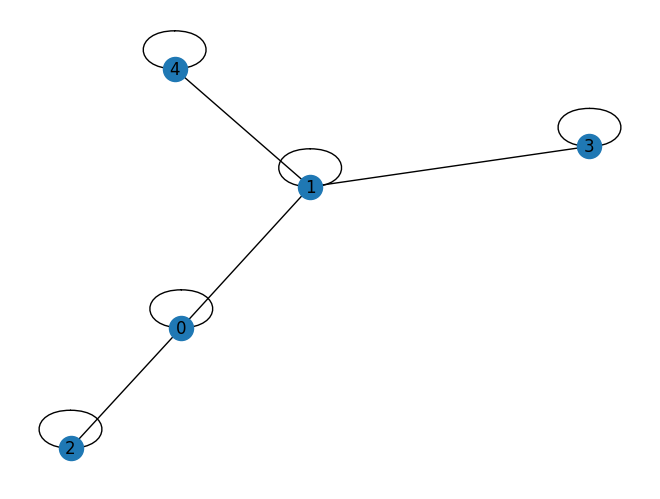

In [6]:
plot_graph(matrix)

### Exercise 2 - Build a Python function `CompleteCheck` testing if a binary relation is _complete_.

In [7]:
def CompleteCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is complete
    """
    matrix = graph_to_matrix(graph)
    n_row, n_col = matrix.shape
    for i in range(n_row):
        for j in range(n_col):
            if matrix[i, j] == 0 or matrix[i, j] == 0:
                return False
    return True

In [8]:
CompleteCheck(matrix)

False

### Exercise 3 - Build a Python function `ReflexiveCheck` testing if a binary relation is _reflexive_.

In [9]:
def ReflexiveCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is reflexive
    """
    matrix = graph_to_matrix(graph)
    return np.all(np.diagonal(matrix) == 1)

In [10]:
ReflexiveCheck(matrix)

True

### Exercise 4 - Build a Python function `AsymmetricCheck` testing if a binary relation is _asymmetric_.

In [11]:
def AntisymmetricCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is antisymmetric
    """
    matrix = graph_to_matrix(graph)
    n_row, n_col = matrix.shape
    for i in range(n_row):
        for j in range(n_col):
            if matrix[i, j] == 1 and matrix[j, i] == 1 and i != j:
                return False
    return True

In [12]:
AntisymmetricCheck(matrix)

True

### Exercise 5 - Build a Python function `SymmetricCheck` testing if a binary relation is _symmetric_.

In [13]:
def SymmetricCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is symmetric
    """
    matrix = graph_to_matrix(graph)
    return np.all(matrix == matrix.T)

In [14]:
SymmetricCheck(matrix)

False

### Exercise 6 - Build a Python function `AntisymmetricCheck` testing if a binary relation is _antisymmetric_.

In [15]:
def AntisymmetricCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is antisymmetric
    """
    matrix = graph_to_matrix(graph)
    matrix_sum = matrix + matrix.T
    check = matrix_sum - np.diag(np.diagonal(matrix_sum))
    return (np.logical_not(np.any(check == 2))).all()

In [16]:
AntisymmetricCheck(matrix)

True

### Exercise 7 - Build a Python function `TransitiveCheck` testing if a binary relation is _transitive_.

In [17]:
def TransitiveCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is transitive
    """
    matrix = graph_to_matrix(graph)
    return np.all(np.linalg.matrix_power(matrix, 3) == matrix)

In [18]:
TransitiveCheck(matrix)

False

### Exercise 8 - Build a Python function `NegativetransitiveCheck` testing if a binary relation is _negativetransitive_.

In [19]:
def NegativetrasiitiveCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is negative transitive
    """
    matrix = graph_to_matrix(graph)
    return np.all(np.linalg.matrix_power(matrix, 3) == 0)

In [20]:
NegativetrasiitiveCheck(matrix)

False

### Exercise 9 - Build a Python function `CompleteOrderCheck` testing if a binary relation is a _complete order_.

In [21]:
def CompleteOrderCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is a complete order
    """
    return CompleteCheck(graph) and AntisymmetricCheck(graph) and TransitiveCheck(graph)

In [22]:
CompleteOrderCheck(matrix)

False

### Exercise 10 - Build a Python function `CompletePreOrderCheck` testing if a binary relation is a _complete pre-order_.

In [23]:
def CompletePreOrderCheck(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Checks if the graph/matrix is a complete preorder
    """
    return CompleteCheck(graph) and TransitiveCheck(graph)

In [24]:
CompletePreOrderCheck(matrix)

False

### Exercise 11 - Build a Python function `StrictRelation` returning the _strict relation_ part of a binary relation.

In [25]:
def StrictRelation(graph: Union[nx.Graph, npmat.matrix]) -> bool:
    """
    Returns a strict relation of a given graph/matrix
    """
    matrix = graph_to_matrix(graph)
    output = matrix.copy()

    for i in range(0,len(matrix)):
        for j in range(0,len(matrix)):
            if matrix[i, j] == 1 and matrix[j, i] == 1:
                output[i, j], output[j, i] = 0, 0
    return npmat.asmatrix(output)

In [26]:
StrictRelation(matrix)

matrix([[0, 1, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

### Exercise 12 - Build a Python function `IndifferenceRelation` returning the _indifference relation_ part of a binary relation.

In [27]:
def IndifferenceRelation(graph: Union[nx.Graph, npmat.matrix]) -> npmat.matrix:
    """
    Returns an indifference relation of a given graph/matrix
    """
    matrix = graph_to_matrix(graph)
    output = np.zeros(matrix.shape)
    for i in range(0,len(matrix)):
        for j in range(0,len(matrix)):
            if matrix[i, j] == 1 and matrix[j, i] == 1:
                output[i, j], output[j, i] = 1, 1
    return npmat.matrix. output

In [28]:
IndifferenceRelation(matrix)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Exercise 13 - Build a Python function `Topologicalsorting` returning a _topological sorting_ of a binary relation.

In [29]:
def Topologicalsorting(graph: Union[nx.Graph, npmat.matrix]) -> list:
    """
    Returns a topological sort of a given graph/matrix
    """
    
    def dagCheck(matrix: npmat.matrix) -> bool:
        matrix -= np.diag(np.diagonal(matrix))
        matrix_reachable, matrix_reachable_sum = np.identity(len(matrix)), np.zeros(matrix.shape)
        for i in range(0, len(matrix)):
            matrix_reachable = matrix_reachable.dot(matrix)
            matrix_reachable_sum += matrix_reachable
        return np.all(np.diagonal(matrix_reachable_sum.dot(matrix_reachable_sum)) == 0)
    
    matrix = graph_to_matrix(graph)

    if not dagCheck(matrix):
        print_error("Graph is not a DAG")
        return
    
    topologicalSorting_matrix = matrix - np.diag(np.diagonal(matrix))
    topologicalSorting_list, original_list = [], list(range(0,len(matrix)))
    while len(original_list) != 0:
        sum = topologicalSorting_matrix.sum(axis=1)
        for i in original_list:
            if sum[i] == 0:
                topologicalSorting_list.append(i)
                topologicalSorting_matrix[:,i] = 0
                original_list.remove(i)
    return topologicalSorting_list

In [30]:
Topologicalsorting(matrix)

[2, 3, 1, 0, 4]